# Dimensionality Reduction Techniques

Dimensionality reduction is a core technique in machine learning and data analysis, aimed at reducing the number of input variables (features) in a dataset while retaining as much relevant information as possible. This improves model performance, reduces computational complexity, and aids in data visualization. We cover six widely‐used methods:

- **Principal Component Analysis (PCA)**
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
- **Uniform Manifold Approximation and Projection (UMAP)**
- **Linear Discriminant Analysis (LDA)**
- **Non-negative Matrix Factorization (NMF)**
- **Autoencoders**

---

## 1. Principal Component Analysis (PCA)

**Principle:**  
PCA is a _linear_ method that projects high-dimensional data onto a lower-dimensional subspace by maximizing variance.

**Dataset:**  
– **Iris Dataset**  
– **Why PCA performs best:** Captures linear correlations (e.g., petal length and width) to reduce dimensions while preserving variance.  
– **Key properties:** Linearly correlated features.  
– **Access:** `scikit-learn` (`load_iris()`).

**Mathematical Foundation:**  
Let $X\in\mathbb{R}^{n\times m}$ be the centered data matrix with $n$ samples and $m$ features.

1. **Covariance matrix:**  
   $$
     C = \frac{1}{n-1}\,X^\top X
   $$
2. **Eigendecomposition:**  
   $$
     C \,\mathbf{v}_i = \lambda_i\,\mathbf{v}_i
   $$
3. **Projection:**  
   Select the top $k$ eigenvectors $V_k$, then  
   $$
     X_{\mathrm{PCA}} = X\,V_k
   $$

![PCA Visualization](comparison_Iris.png)

---

## 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

**Principle:**  
t-SNE is a _nonlinear_ method used mainly for visualization. It preserves local neighborhood structures and emphasizes clustering patterns.

**Dataset:**  
– **Penguins Dataset**  
– **Why t-SNE performs best:** Preserves local clusters (e.g., species groups) for effective 2D/3D visualization.  
– **Key properties:** Distinct clusters based on similarity.  
– **Access:** `seaborn` (`load_dataset('penguins')`).

**Mathematical Foundation:**  
1. **High-dimensional similarities:**  
   $$
     p_{j|i} = \frac{\exp\bigl(-\|x_i - x_j\|^2 / 2\sigma_i^2\bigr)}
                      {\sum_{k \neq i} \exp\bigl(-\|x_i - x_k\|^2 / 2\sigma_i^2\bigr)},\quad
     p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
   $$
2. **Low-dimensional similarities:**  
   $$
     q_{ij} = \frac{\bigl(1 + \|y_i - y_j\|^2\bigr)^{-1}}
                   {\sum_{k \neq l} \bigl(1 + \|y_k - y_l\|^2\bigr)^{-1}}
   $$
3. **Cost (KL divergence):**  
   $$
     C = \sum_{i \neq j} p_{ij}\,\log\!\Bigl(\tfrac{p_{ij}}{q_{ij}}\Bigr)
   $$

![t-SNE Visualization](comparison_Penguins.png)

---

## 3. Uniform Manifold Approximation and Projection (UMAP)

**Principle:**  
UMAP is a manifold learning technique that preserves both local and global data structure.

**Dataset:**  
– **Digits Dataset**  
– **Why UMAP performs best:** Balances local (within-class) and global (between-class) structures for comprehensive visualization.  
– **Key properties:** Local and global structure mix.  
– **Access:** `scikit-learn` (`load_digits()`).

**Mathematical Foundation:**  
1. **High-dimensional graph weights:**  
   $$
     w_{ij} = \exp\!\Bigl(-\tfrac{d(x_i, x_j) - \rho_i}{\sigma_i}\Bigr)
   $$
2. **Low-dimensional graph weights:**  
   $$
     w'_{ij} = \bigl(1 + a\,\|y_i - y_j\|^{2b}\bigr)^{-1}
   $$
3. **Optimization:**  
   Minimize cross-entropy between high- and low-dimensional graphs.

![UMAP Visualization](comparison_Digits.png)

---

## 4. Linear Discriminant Analysis (LDA)

**Principle:**  
LDA is a _supervised_ linear technique that finds the projection maximizing class separability.

**Dataset:**  
– **Wine Dataset**  
– **Why LDA performs best:** Maximizes class separability using linear combinations of features (e.g., chemical properties).  
– **Key properties:** Well-separated classes.  
– **Access:** `scikit-learn` (`load_wine()`).

**Mathematical Foundation:**  
1. **Within-class scatter:**  
   $$
     S_W = \sum_c \sum_{i\in c} (x_i - \mu_c)(x_i - \mu_c)^\top
   $$
2. **Between-class scatter:**  
   $$
     S_B = \sum_c n_c\,(\mu_c - \mu)(\mu_c - \mu)^\top
   $$
3. **Eigenproblem:**  
   $$
     S_B\,\mathbf{w} = \lambda\,S_W\,\mathbf{w}
   $$

![LDA Visualization](comparison_Wine.png)

---

## 5. Non-negative Matrix Factorization (NMF)

**Principle:**  
NMF factorizes a non-negative matrix into two lower-rank non-negative matrices.

**Dataset:**  
– **Breast Cancer Dataset**  
– **Why NMF performs best:** Decomposes non-negative features (e.g., cell nuclei measurements) into parts-based representations.  
– **Key properties:** Non-negative values.  
– **Access:** `scikit-learn` (`load_breast_cancer()`).

**Mathematical Foundation:**  
Given $X\in\mathbb{R}^{m\times n},\,X\ge0$, find $W\in\mathbb{R}^{m\times k},\,H\in\mathbb{R}^{k\times n}$ such that
$$
  X \approx W\,H,
  \quad
  \min_{W,H\ge0}\|X - WH\|_F^2.
$$

![NMF Visualization](comparison_Breast_Cancer.png)

---

## 6. Autoencoders

**Principle:**  
Autoencoders are neural networks trained to compress (encode) and reconstruct (decode) input data.

**Dataset:**  
– **Swiss Roll Dataset**  
– **Why Autoencoders perform best:** Learns non-linear mappings to unroll complex manifolds into lower dimensions.  
– **Key properties:** Non-linear structure.  
– **Access:** `scikit-learn` (`make_swiss_roll()`).

**Mathematical Foundation:**  
1. **Encoder:**  
   $$
     z = \sigma(W_e x + b_e)
   $$
2. **Decoder:**  
   $$
     x' = \sigma(W_d z + b_d)
   $$
3. **Loss:**  
   $$
     L = \frac{1}{n}\sum_{i=1}^n \|x_i - x_i'\|^2.
   $$

![Autoencoder Visualization](comparison_Swiss_Roll.png)

---

### Summary Table

| Method       | Linear? | Supervised? | Local Structure | Global Structure | Notes                           | Dataset              |
|:------------:|:-------:|:-----------:|:---------------:|:----------------:|:--------------------------------|:--------------------:|
| PCA          | ✔       | ✘           | ❌              | ✔                | Maximizes variance              | Iris                 |
| t-SNE        | ✘       | ✘           | ✔              | ❌               | Excellent for visualization     | Penguins             |
| UMAP         | ✘       | ✘           | ✔              | ✔                | Preserves more structure        | Digits               |
| LDA          | ✔       | ✔           | ❌              | ✔                | Maximizes class separability    | Wine                 |
| NMF          | ✔       | ✘           | ❌              | ✔                | Parts-based representation       | Breast Cancer        |
| Autoencoder  | ✘       | ✘           | ✔               | Depends          | Learns via reconstruction       | Swiss Roll           |


c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


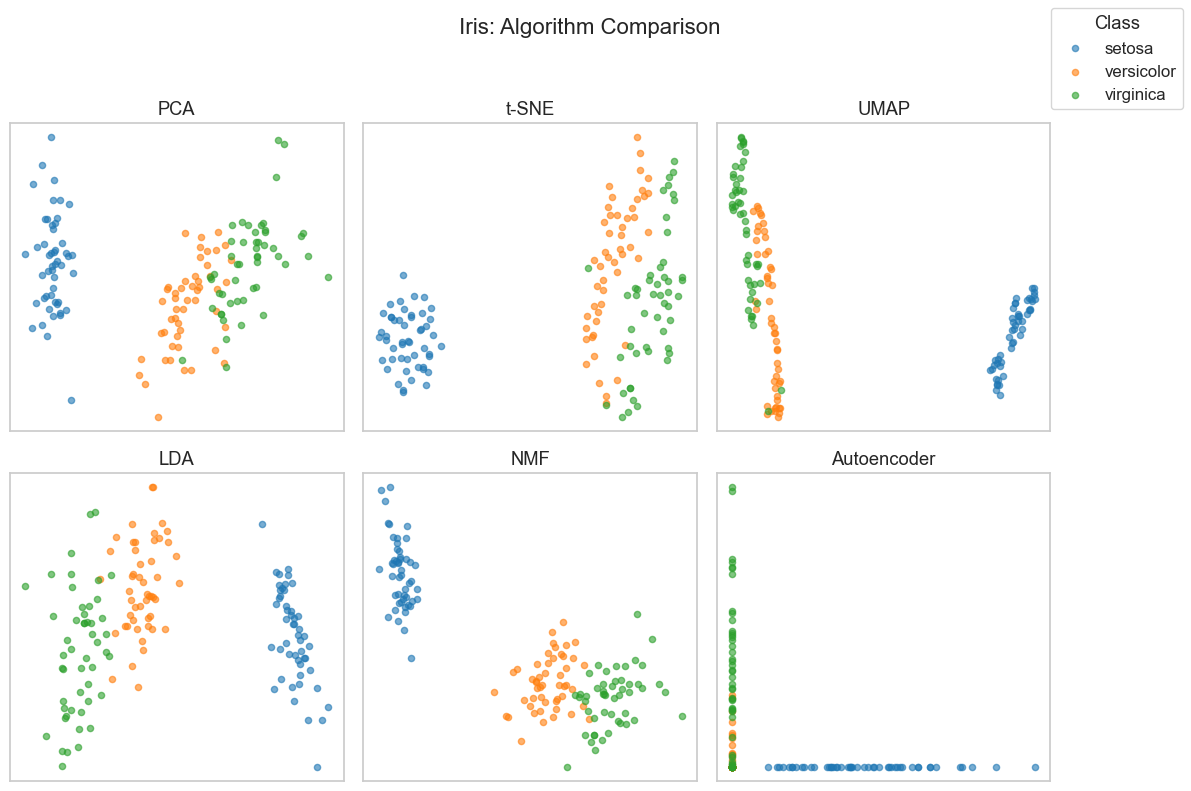

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


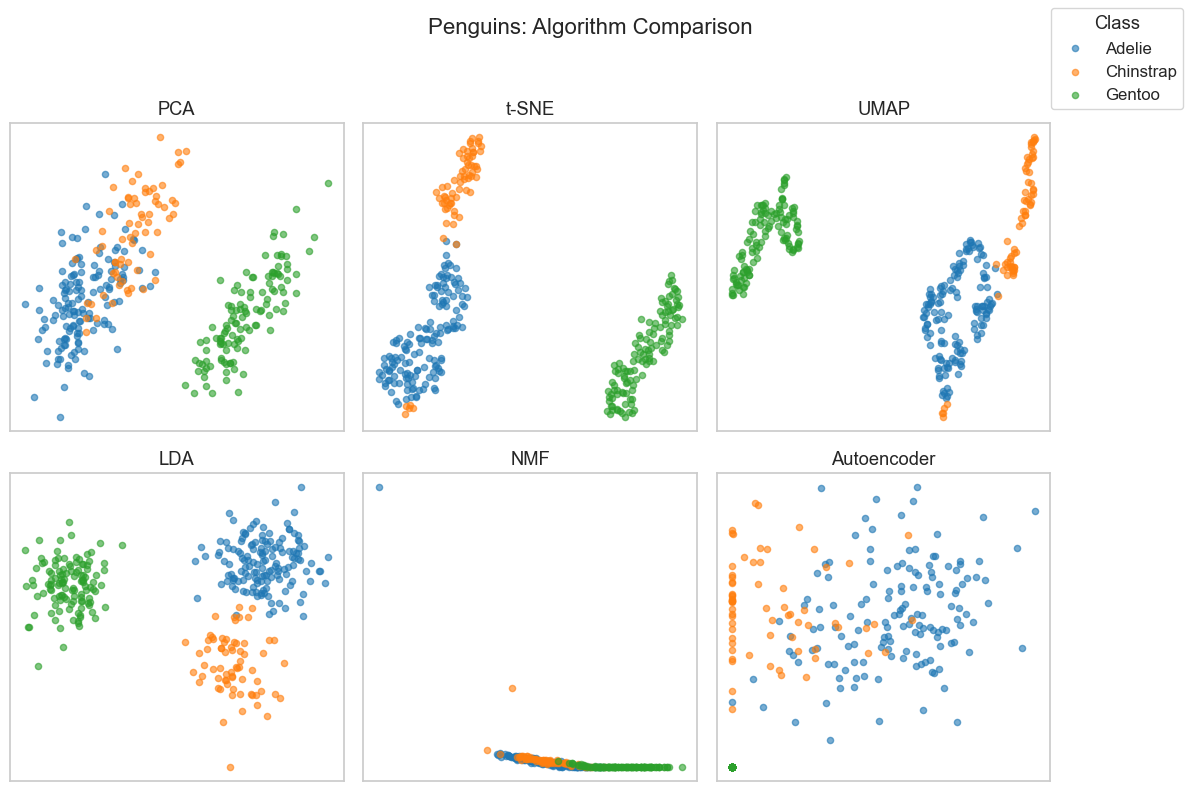

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


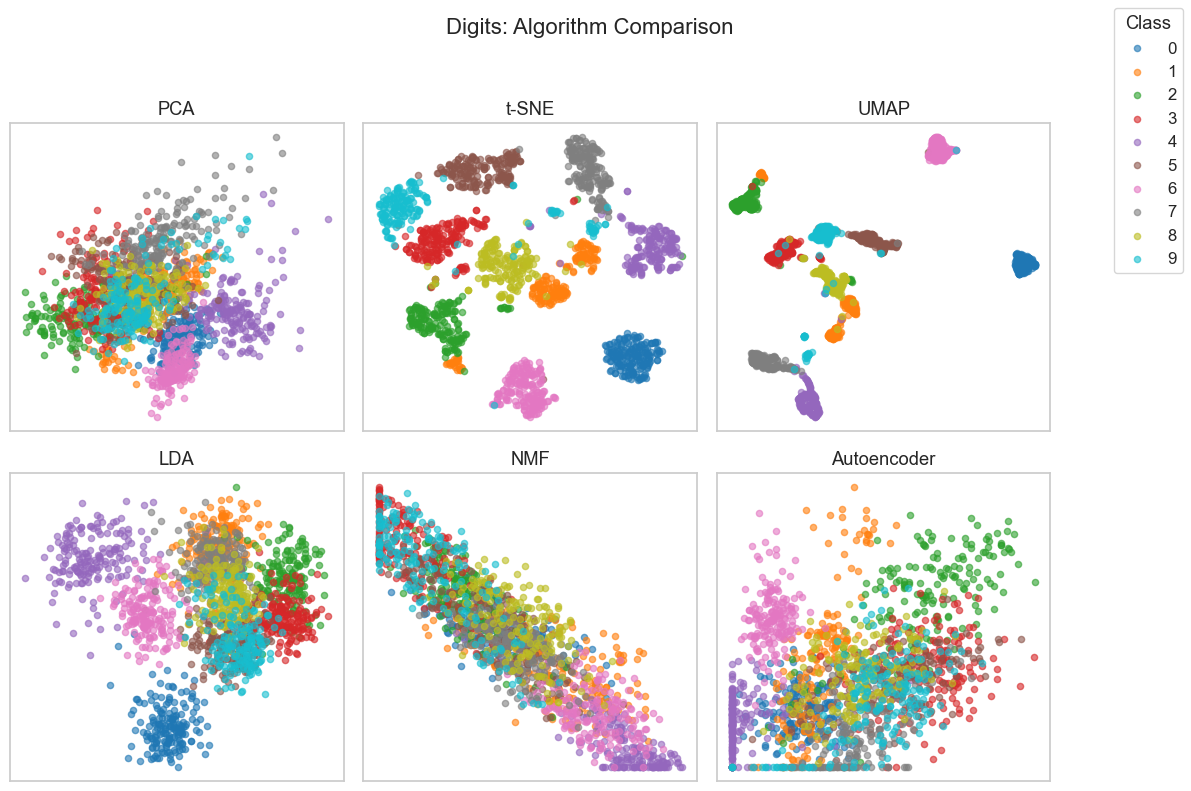

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


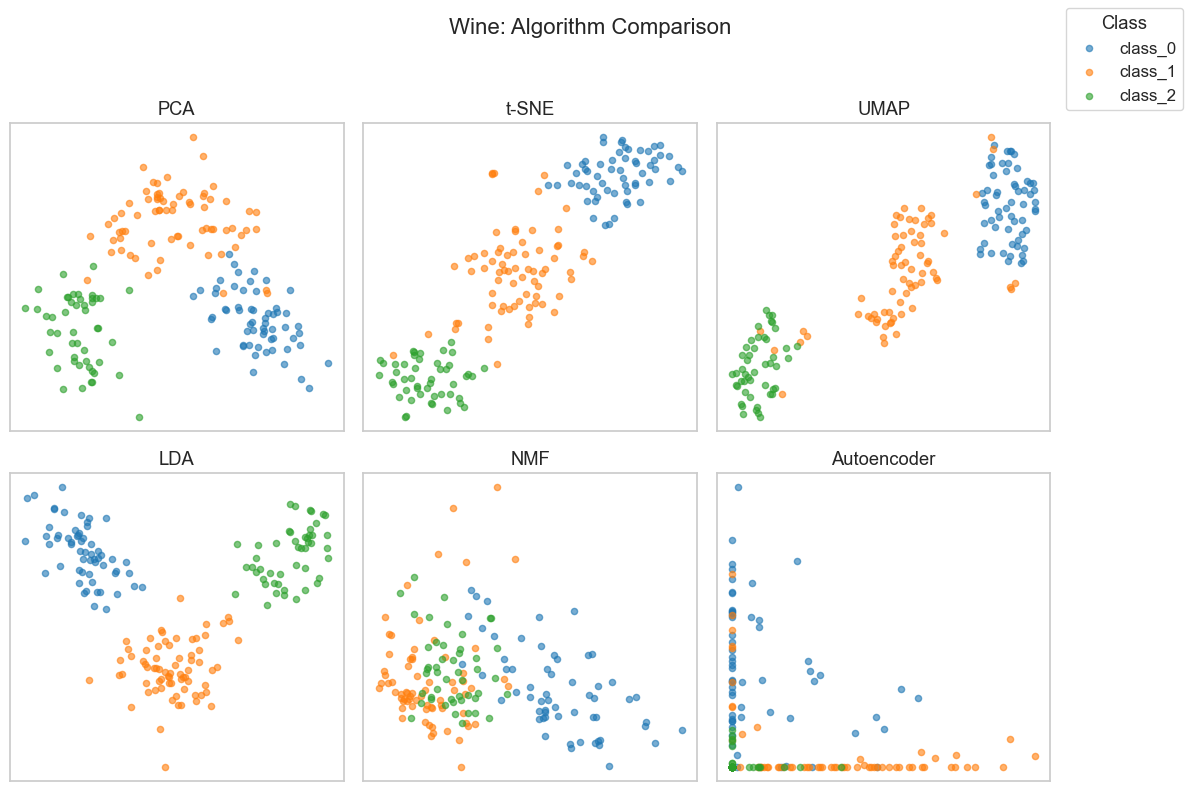

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


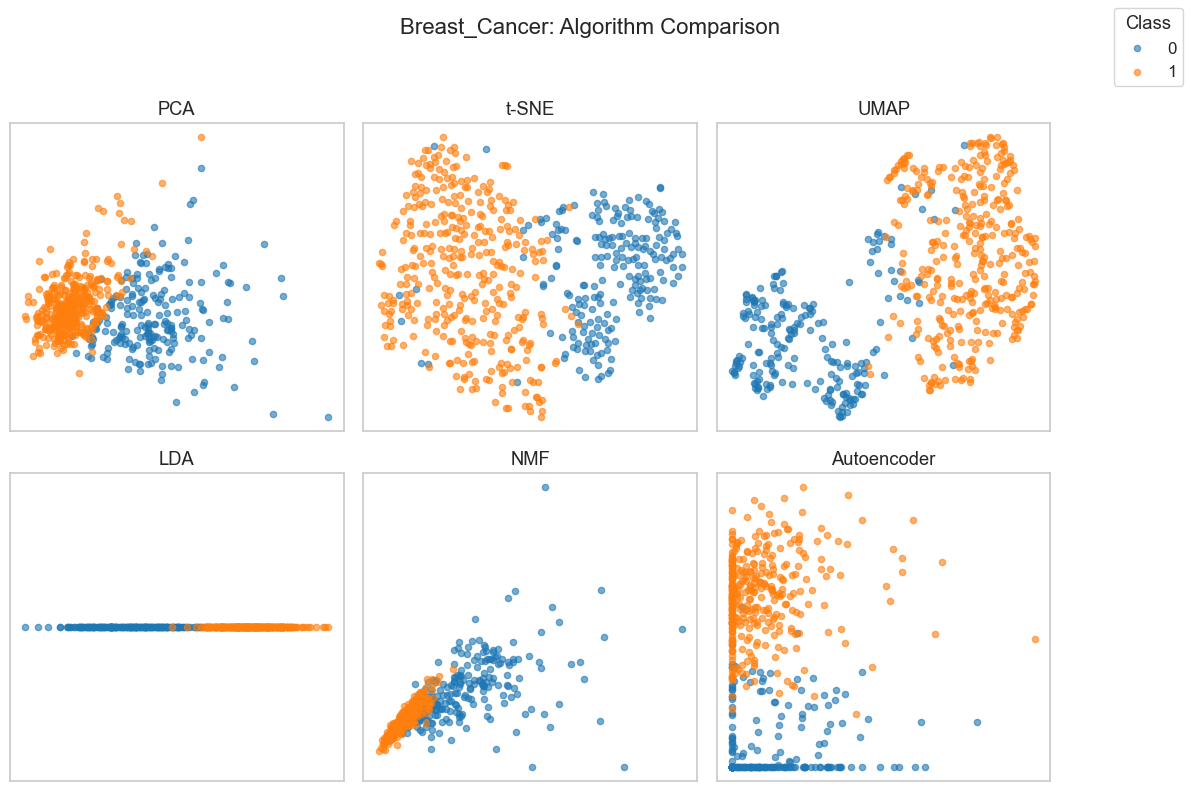

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


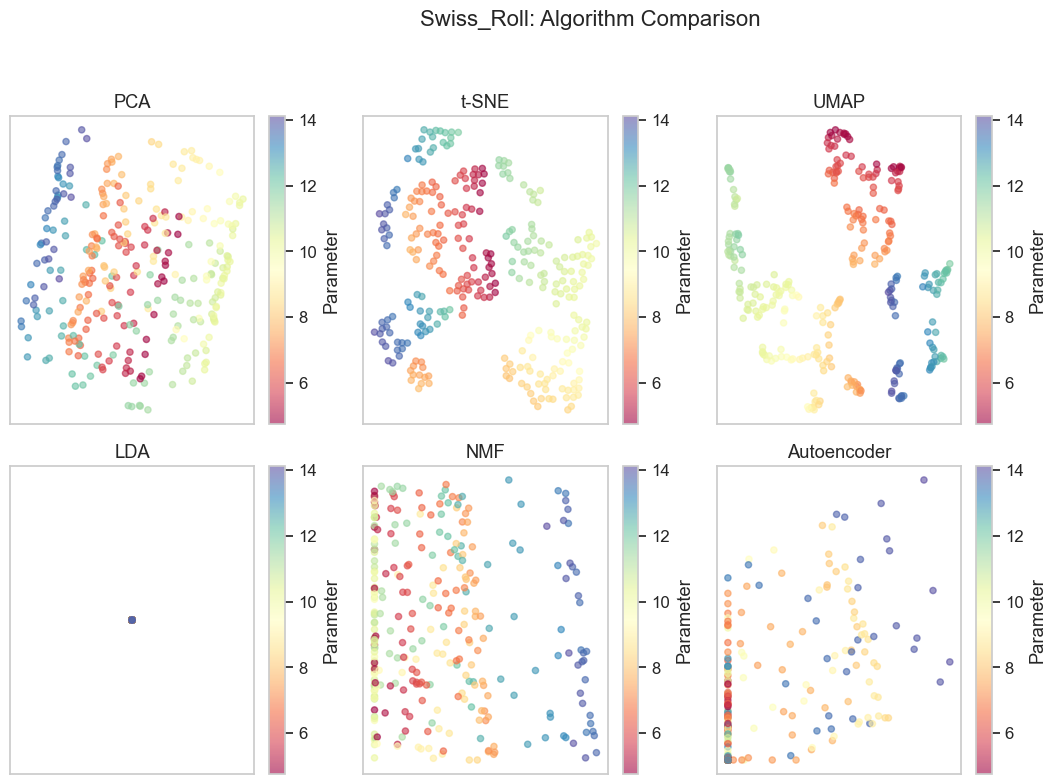

Generated comparison figures (one per dataset), including Swiss Roll with continuous coloring.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer, make_swiss_roll
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# ================= Set Global Plot Aesthetics =================
sns.set(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (6, 5)

# ================= Dataset Loading and Preparation =================
def load_datasets():
    datasets = {}
    iris = load_iris()
    datasets['Iris'] = (iris.data, iris.target, iris.target_names)

    penguins = sns.load_dataset('penguins').dropna()
    Xp = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
    yp = LabelEncoder().fit_transform(penguins['species'])
    classes_p = np.unique(penguins['species'])
    datasets['Penguins'] = (Xp, yp, classes_p)

    digits = load_digits()
    datasets['Digits'] = (digits.data, digits.target, [str(i) for i in np.unique(digits.target)])

    wine = load_wine()
    datasets['Wine'] = (wine.data, wine.target, wine.target_names)

    bc = load_breast_cancer()
    datasets['Breast_Cancer'] = (bc.data, bc.target, [str(i) for i in np.unique(bc.target)])

    Xsr, tsr = make_swiss_roll(n_samples=300, noise=0.1, random_state=0)
    # For Swiss Roll, treat tsr as continuous for coloring
    datasets['Swiss_Roll'] = (Xsr, tsr, None)
    
    return datasets

# ================= Single-Algorithm Embedding Plot =================
def plot_embedding(X_emb, title, file_name, y=None, classes=None):
    plt.figure()
    if y is None or classes is None:
        # Plot unlabeled or continuous
        scatter = plt.scatter(X_emb[:,0], X_emb[:,1], c=y if y is not None else 'gray',
                              cmap='Spectral' if y is not None else None,
                              s=40, alpha=0.7)
        if y is not None:
            plt.colorbar(scatter, label='Parameter')
    else:
        palette = sns.color_palette('tab10', n_colors=len(classes))
        for idx, cls in enumerate(classes):
            mask = (y == idx)
            plt.scatter(X_emb[mask,0], X_emb[mask,1], label=cls,
                        color=palette[idx], s=40, alpha=0.8)
        plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.savefig(file_name, dpi=150)
    plt.close()

# ================= Combined Comparison Plot =================
def plot_comparison(ds_name, embeddings, y=None, classes=None):
    algs = list(embeddings.keys())
    n = len(algs)
    cols = 3
    nrows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(nrows, cols, figsize=(cols*4, nrows*4), squeeze=False)

    for i, alg in enumerate(algs):
        ax = axes[i//cols, i%cols]
        X_emb = embeddings[alg]
        if y is None:
            ax.scatter(X_emb[:,0], X_emb[:,1], c='gray', s=20, alpha=0.6)
        elif classes is None:
            sc = ax.scatter(X_emb[:,0], X_emb[:,1], c=y, cmap='Spectral', s=20, alpha=0.6)
            fig.colorbar(sc, ax=ax, label='Parameter')
        else:
            palette = sns.color_palette('tab10', n_colors=len(classes))
            for idx, cls in enumerate(classes):
                mask = (y == idx)
                ax.scatter(X_emb[mask,0], X_emb[mask,1], label=cls,
                           color=palette[idx], s=20, alpha=0.6)
        ax.set_title(alg)
        ax.set_xticks([])
        ax.set_yticks([])
    # Remove empty subplots
    for j in range(n, nrows*cols):
        fig.delaxes(axes[j//cols, j%cols])

    fig.suptitle(f'{ds_name}: Algorithm Comparison', fontsize=16)
    if classes is not None:
        fig.legend(classes, title='Class', loc='upper right')
    plt.tight_layout(rect=[0,0,0.9,0.95])
    plt.savefig(f'comparison_{ds_name}.png', dpi=150)
    plt.show()

# ================= Dimensionality Reduction Procedures =================
def run_algorithms(datasets):
    scaler = StandardScaler()
    for ds_name, (X, y, classes) in datasets.items():
        X_scaled = scaler.fit_transform(X)
        embeddings = {}

        # 1. PCA
        embeddings['PCA'] = PCA(n_components=2).fit_transform(X_scaled)
        # 2. t-SNE
        embeddings['t-SNE'] = TSNE(n_components=2, random_state=0).fit_transform(X_scaled)
        # 3. UMAP
        embeddings['UMAP'] = umap.UMAP(n_components=2, random_state=0).fit_transform(X_scaled)
        # 4. LDA
        try:
            n_comp = 2 if (y is not None and len(np.unique(y))>2) else 1
            lda = LinearDiscriminantAnalysis(n_components=n_comp)
            X_lda = lda.fit_transform(X_scaled, y)
            if n_comp == 1:
                X_lda = np.hstack([X_lda, np.zeros((len(X_lda),1))])
        except Exception:
            X_lda = np.zeros((X_scaled.shape[0], 2))
        embeddings['LDA'] = X_lda
        # 5. NMF
        try:
            X_nonneg = np.where(X<0, 0, X)
            embeddings['NMF'] = NMF(n_components=2, init='random', random_state=0).fit_transform(X_nonneg)
        except Exception:
            embeddings['NMF'] = np.zeros((X.shape[0], 2))
        # 6. Autoencoder
        input_dim = X_scaled.shape[1]
        inp = Input(shape=(input_dim,))
        encoded = Dense(2, activation='relu')(inp)
        decoded = Dense(input_dim, activation='linear')(encoded)
        autoenc = Model(inp, decoded)
        encoder = Model(inp, encoded)
        autoenc.compile(optimizer='adam', loss='mse')
        autoenc.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=0)
        embeddings['Autoencoder'] = encoder.predict(X_scaled, verbose=0)

        # Plot and save
        plot_comparison(ds_name, embeddings, y, classes)

if __name__ == '__main__':
    datasets = load_datasets()
    run_algorithms(datasets)
    print("Generated comparison figures (one per dataset), including Swiss Roll with continuous coloring.")
